In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [5]:
def func(x):
    return x*5 + 9

In [6]:
objects_num = 50
X = np.linspace(-5, 5, objects_num)
y = func(X) + np.random.randn(objects_num) * 5

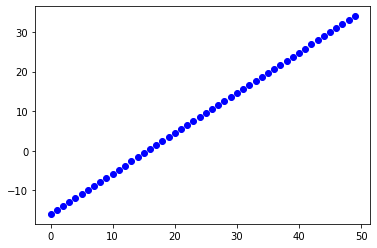

In [7]:
fig, ax = plt.subplots()
ax.plot(func(X), 'bo')
plt.show()

In [47]:
class LinearReg():
    
    def __init__(self, reg='ridge', reg_coef=0.01):
        self.w = None
        self.reg = reg
        self.reg_coef = reg_coef
        
    def fit(self, X, y, max_iter=100, lr=0.01):
        n, k = X.shape
        
        
        X_train = np.hstack((X, np.ones((n, 1))))
        
        if self.w == None:
            self.w = np.random.randn(k + 1)
        
        self.loss = []
        
        for i in range(max_iter):
            y_pred = self.predict(X)
            self.loss.append((mean_squared_error(y_pred , y)))
            
            self.w -= lr * self.calc_grad(X=X_train, y_pred=y_pred, y=y)
    
    def predict(self, X):
        n, k = X.shape
        return np.hstack((X, np.ones((n, 1)))) @ self.w
    
    def calc_grad(self, X, y_pred, y):
        if self.reg=='ridge':
            return ((2 * (y_pred - y)[:, np.newaxis] * X) + 2 * self.reg_coef * self.w).mean(axis=0)
        elif self.reg=='lasso':
            return ((2 * (y_pred - y)[:, np.newaxis] * X) + 2 * self.reg_coef * np.sign(self.w)).mean(axis=0)
        else:
            return (2 * (y_pred - y)[:, np.newaxis] * X).mean(axis=0)
    
    def get_weights(self):
        return self.w

In [63]:
Lr = LinearReg(reg='lasso', reg_coef=1)
Lr.fit(X[:,np.newaxis],y)

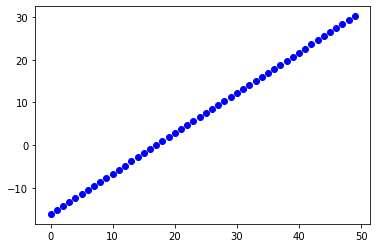

In [64]:

fig, ax = plt.subplots()
ax.plot(Lr.predict(X[:, np.newaxis]), 'bo')
plt.show()

In [65]:
mean_squared_error(Lr.predict(X[:, np.newaxis]),y)

23.747428292219247